# Downloading ERA5 data and creating a cutout

In this example we download ERA5 data on-demand for a cutout we want to create.

This only works if you have in before
 * Installed the Copernicus Climate Data Store 'cdsapi' package
 * Registered and setup your cdsapi key as described here
   https://cds.climate.copernicus.eu/api-how-to

Atlite does also work with other datasources, but ERA5 is the easiest one to get started.

In [1]:
import atlite

In [2]:
# (Optional, but always recommended) Register a logger to get informative messages
import logging
logging.basicConfig(level=logging.INFO)

## Define the cutout
*This will not yet trigger any major operations.*

The cutout contains

* data from the ERA5 dataset
* data on the Republic of Ireland + UK + parts of the atlantic ocean
* the time slice of January 2011

and is stored in the local directory (`cutout_dir= "./"`) with the `name="western-europe-2011-01"`.

In [3]:
cutout = atlite.Cutout(name="western-europe-2011-01",
                       cutout_dir="./",
                       module="era5",
                       x=slice(-13.6913, 1.7712),
                       y=slice(60.8479, 49.9096),
                       time="2011-01"
                       )

INFO:atlite.cutout:Cutout western-europe-2011-01 not found in directory ./, building new one


## Preparation of the cutout

If the cutout does not yet exist ("is prepared"),
then this is where all the work actually happens.

In [4]:
# This is where all the work happens (this can take some time).
cutout.prepare()

INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is running
INFO:cdsapi:Request is running
INFO:cdsapi:Request is running
INFO:cdsapi:Request is running
INFO:cdsapi:Request is running
INFO:cdsapi:Request is completed
INFO:atlite.datasets.common:Downloading request for 9 variables to C:\Users\USER\AppData\Local\Temp\tm

In [5]:
# The cutout is now prepared
cutout

<Cutout western-europe-2011-01 x=-13.50-1.75 y=60.75-50.00 time=2011-01-01T00:00:00.000000000-2011-01-31T23:00:00.000000000 prepared_features=['temperature', 'runoff', 'wind', 'height', 'influx'] is_view=False>

In [7]:
# prepared_features tells you which data is already included in the cutout
# If you choose datasources other than ERA5, you can include data features
# consecutively instead of all at once
cutout.prepared_features

{'height', 'influx', 'runoff', 'temperature', 'wind'}

In [9]:
# You can access the xarray data underlying the cutout.
# Note that xarray implements lazy loading, i.e. only the
# data in the end/beginning is loaded, all the other data
# marked with "..." is only on disk, not in memory
cutout.data

<xarray.Dataset>
Dimensions:           (time: 744, x: 62, y: 44)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 60.75 60.5 60.25 60.0 ... 50.5 50.25 50.0
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lat               (y) float64 ...
    lon               (x) float64 ...
Data variables:
    height            (y, x) float32 ...
    temperature       (time, y, x) float32 ...
    soil temperature  (time, y, x) float32 ...
    roughness         (time, y, x) float32 ...
    wnd100m           (time, y, x) float32 ...
    runoff            (time, y, x) float32 ...
    influx_toa        (time, y, x) float32 ...
    influx_direct     (time, y, x) float32 ...
    albedo            (time, y, x) float32 ...
    influx_diffuse    (time, y, x) float32 ...
Attributes:
    module:               era5
    prepared_features:    ['height', 'temperature', 'wind', 'runoff', 'influx']
    creati

In [11]:
# The meta information from creation of your cutout
for k,v in cutout.data.attrs.items():
    print(k,v)

module era5
prepared_features ['height', 'temperature', 'wind', 'runoff', 'influx']
creation_parameters {'x': slice(-13.6913, 1.7712, None), 'y': slice(60.8479, 49.9096, None), 'time': '2011-01'}


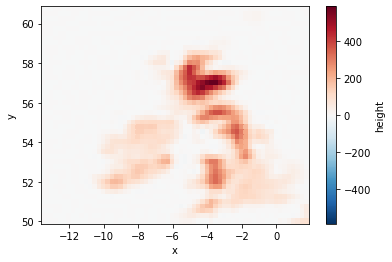

In [12]:
# If you have matplotlib installed, you can also directly
# utilise the plot functionality of xarray to inspect the
# data of your cutout, e.g. the height of the grid points
import matplotlib.pyplot as plt
cutout.data.height.plot()